Fetching data for India...
Fetching data for Brazil...
Fetching data for Mexico...
Fetching data for Indonesia...
Fetching data for South Africa...
Fetching data for Turkey...
✅ Data fetching completed!


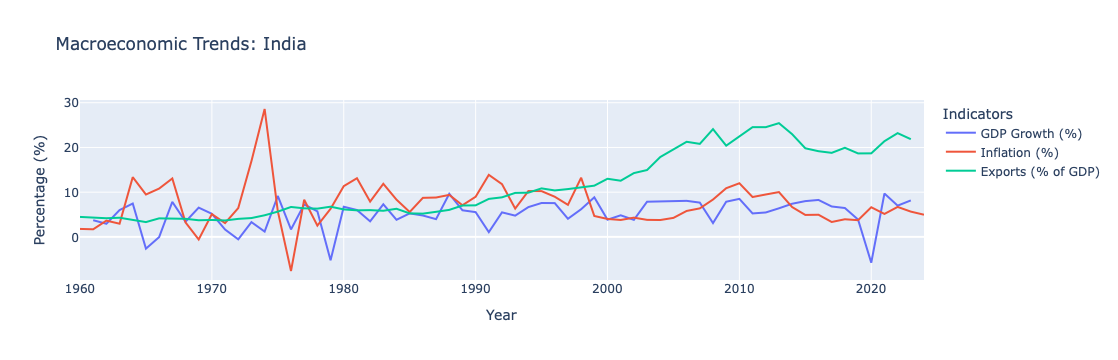

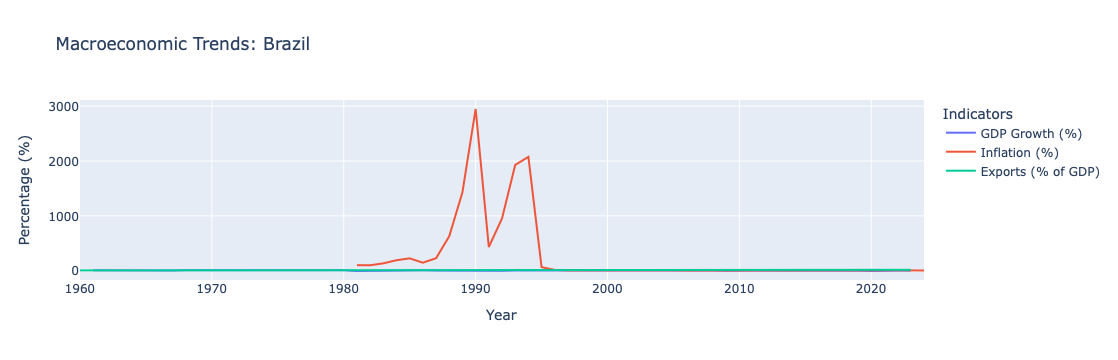

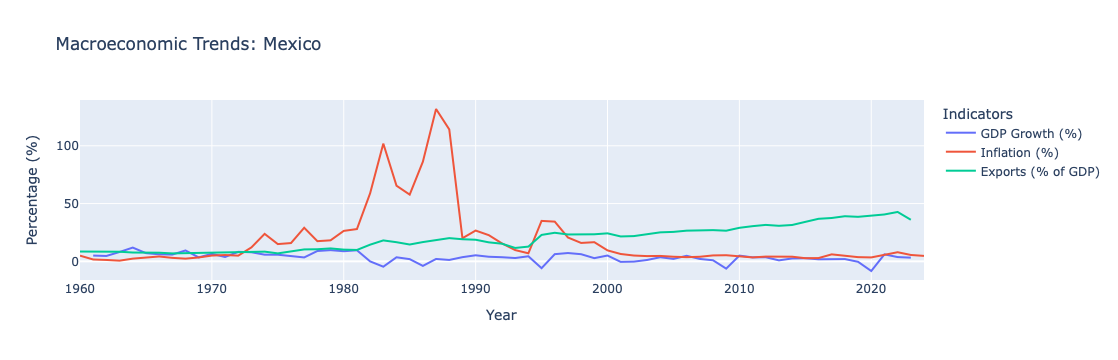

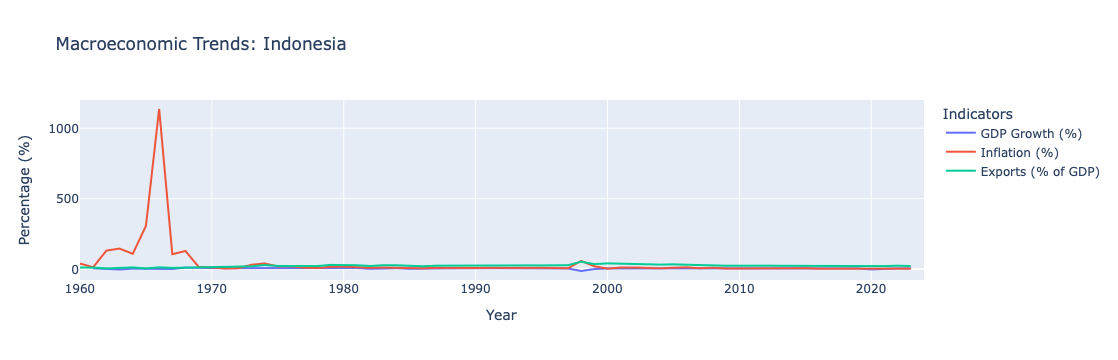

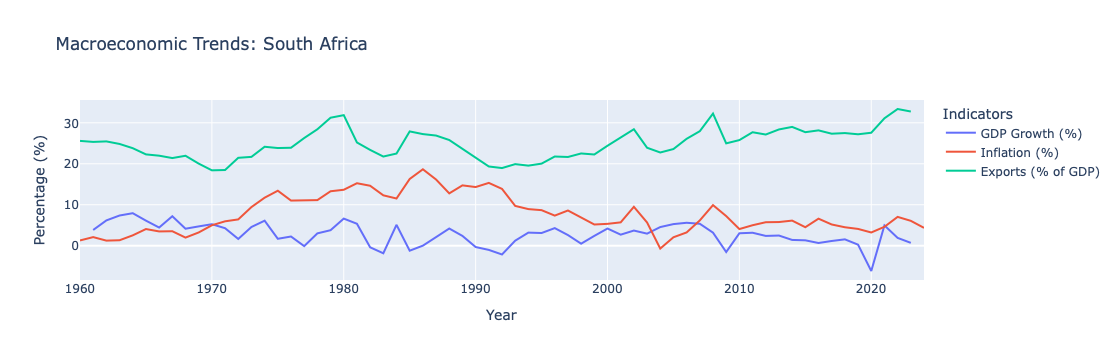

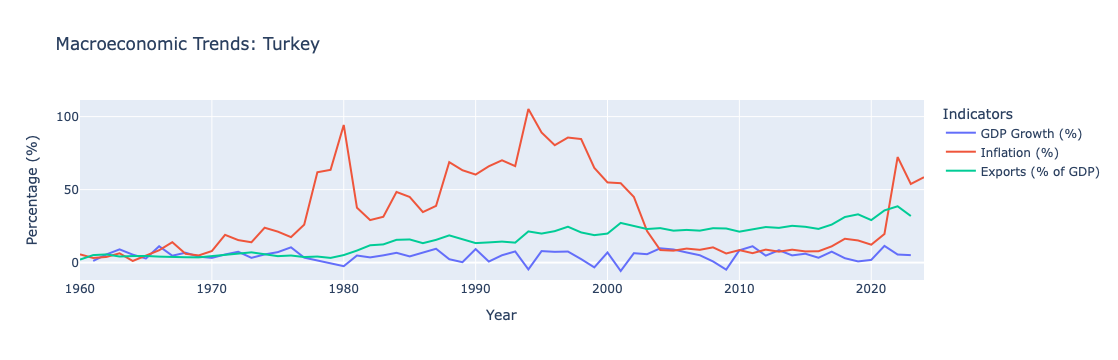

In [18]:
# emerging_markets_analysis.ipynb

# 1. Import libraries
import pandas as pd
import requests
import plotly.express as px
import os

# 2. Create a folder for saving data
if not os.path.exists('data'):
    os.makedirs('data')

# 3. Define emerging markets countries and indicators
countries = {
    'IN': 'India',
    'BR': 'Brazil',
    'MX': 'Mexico',
    'ID': 'Indonesia',
    'ZA': 'South Africa',
    'TR': 'Turkey'
}

indicators = {
    'NY.GDP.MKTP.KD.ZG': 'GDP Growth (%)',
    'FP.CPI.TOTL.ZG': 'Inflation (%)',
    'NE.EXP.GNFS.ZS': 'Exports (% of GDP)'
}

# 4. Fetch data function using World Bank API
def fetch_world_bank_data(country_code, indicator_code):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_code}?format=json&per_page=500"
    response = requests.get(url)
    if response.status_code == 200:
        json_data = response.json()
        if json_data and len(json_data) > 1:
            data = json_data[1]
            df = pd.DataFrame(data)
            df = df[['date', 'value']]
            df.columns = ['Year', indicator_code]
            df['Year'] = df['Year'].astype(int)
            df.sort_values('Year', inplace=True)
            return df
    return pd.DataFrame()

# 5. Download data for all countries and indicators
all_data = {}

for code, name in countries.items():
    print(f"Fetching data for {name}...")
    country_df = pd.DataFrame()
    for ind_code, ind_name in indicators.items():
        df = fetch_world_bank_data(code, ind_code)
        if not df.empty:
            df = df.rename(columns={ind_code: ind_name})
            if country_df.empty:
                country_df = df
            else:
                country_df = pd.merge(country_df, df, on="Year", how="outer")
    all_data[code] = country_df
    country_df.to_csv(f"data/{code}_macro_data.csv", index=False)

print("✅ Data fetching completed!")

# 6. Quick Visualization
for code, name in countries.items():
    df = all_data[code]
    fig = px.line(df, x='Year', y=['GDP Growth (%)', 'Inflation (%)', 'Exports (% of GDP)'],
                  title=f"Macroeconomic Trends: {name}",
                  labels={"value": "Percentage (%)", "variable": "Indicators"})
    fig.show()
